# Prevendo o valor do plano de saúde - Intermediário

As ideias por trás deste notebook podem ser melhor compreendidas por meio do post do Medium cujo link se encontra no arquivo readme.

## Conhecendo o dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading csv data from url
data = pd.read_csv('https://raw.githubusercontent.com/lucastadeump/medium_publications/master/health_insurance/insurance.csv')

#getting dataset's head
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Distinct values
print('sex:', data.sex.unique())
print('children:', data.children.unique())
print('region:', data.region.unique())
print('smoker:', data.smoker.unique())

# Number of distinct values
print('age:', data.age.nunique())

# Describe continuous data
print(data[['bmi', 'charges']].describe())

sex: ['female' 'male']
children: [0 1 3 2 5 4]
region: ['southwest' 'southeast' 'northwest' 'northeast']
smoker: ['yes' 'no']
age: 47
               bmi       charges
count  1338.000000   1338.000000
mean     30.663397  13270.422265
std       6.098187  12110.011237
min      15.960000   1121.873900
25%      26.296250   4740.287150
50%      30.400000   9382.033000
75%      34.693750  16639.912515
max      53.130000  63770.428010


In [4]:
data.shape

(1338, 7)

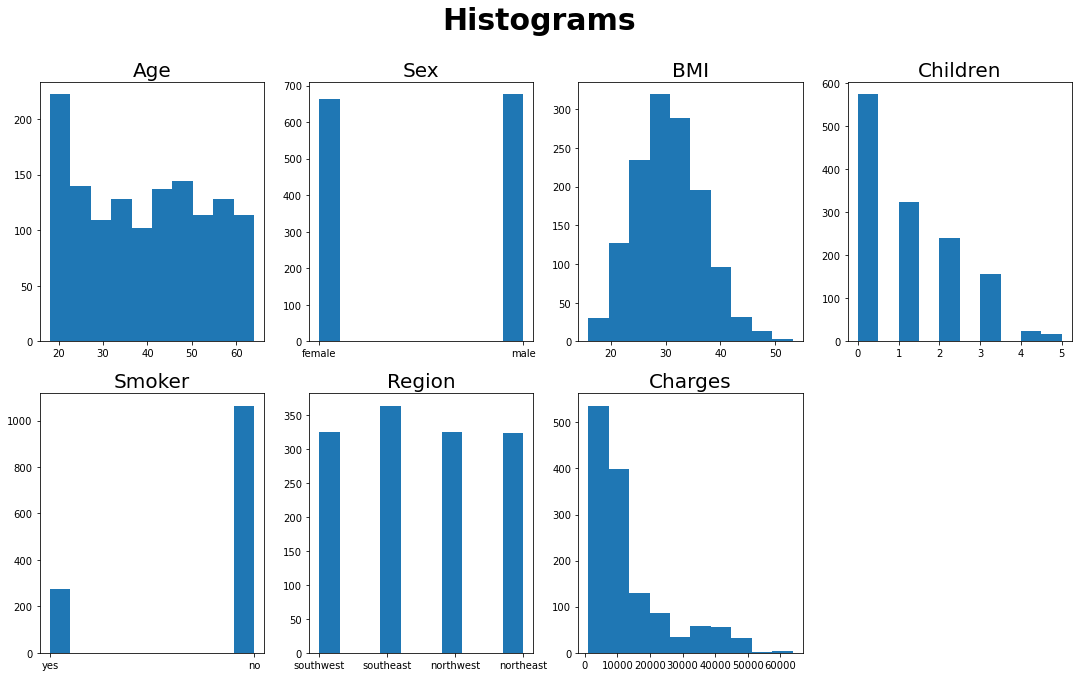

In [5]:
fig, axs = plt.subplots(2,4)
fig.suptitle('Histograms', fontsize=30, weight = 'bold', y=0.98)
fig.set_size_inches(18.5, 10.5)

axs[0,0].hist(data['age'])
axs[0,0].set_title('Age', size=20)

axs[0,1].hist(data['sex'])
axs[0,1].set_title('Sex', size=20)

axs[0,2].hist(data['bmi'])
axs[0,2].set_title('BMI', size=20)

axs[0,3].hist(data['children'])
axs[0,3].set_title('Children', size=20)

axs[1,0].hist(data['smoker'])
axs[1,0].set_title('Smoker', size=20)

axs[1,1].hist(data['region'])
axs[1,1].set_title('Region', size=20)

axs[1,2].hist(data['charges'])
axs[1,2].set_title('Charges', size=20)

fig.delaxes(axs[1,3])

# Criando um conjunto de testes

In [6]:
from sklearn.model_selection import train_test_split

#creating randomized train and test sets
train_rdm, test_rdm = train_test_split(data, test_size = 0.2, random_state = 42)

print(len(train_rdm), "train +", len(test_rdm), "test")

1070 train + 268 test


In [7]:
test_rdm

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180
...,...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast,47055.53210
575,58,female,27.170,0,no,northwest,12222.89830
535,38,male,28.025,1,no,northeast,6067.12675
543,54,female,47.410,0,yes,southeast,63770.42801


In [8]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

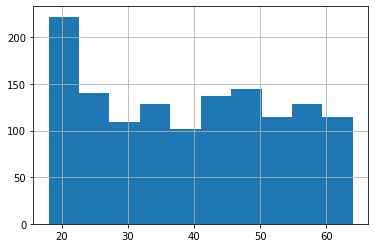

In [9]:
data.age.hist()

In [10]:
#function to categorize age
def categorize_age(age):
    if age <= 25:
        return 1
    elif 25 < age <= 40:
        return 2
    elif 40 < age <= 55:
        return 3
    else:
        return 4

#creating attribute age_cat
data['age_cat'] = data['age'].apply(categorize_age)

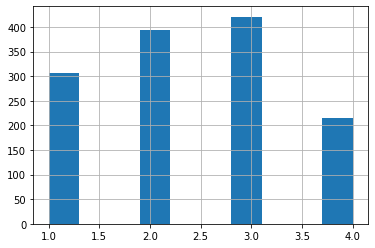

In [11]:
data.age_cat.hist()

Text(0.5, 1.0, 'Age categorized')

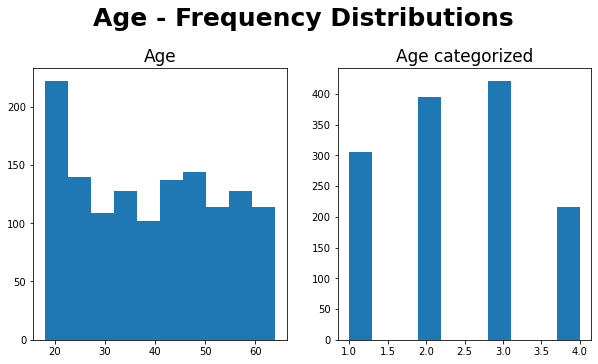

In [12]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Age - Frequency Distributions', weight = 'bold',fontsize=25, y =1.05)
fig.set_size_inches(10, 5)

axs[0].hist(data.age)
axs[0].set_title('Age', size=17)

axs[1].hist(data.age_cat)
axs[1].set_title('Age categorized', size=17)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

#creating split for indexes
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#applying split on data and getting train and test stratified sets
for train_index, test_index in split.split(data, data['age_cat']):
    train_str = data.loc[train_index]
    test_str = data.loc[test_index]

In [14]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
#creating function to get proportions of attribute
def proportions(attr):
    return attr.value_counts() / len(attr)

#creating randomized train test split, but now with age_cat
train_rdm, test_rdm = train_test_split(data, test_size=0.2, random_state=42)

#creating table
table_proportions = pd.DataFrame({
    "Overall": proportions(data['age_cat']),
    "Stratified": proportions(train_str['age_cat']),
    "Random": proportions(train_rdm['age_cat']),
}).sort_index()
table_proportions["Strat. %Error"] = 100 * table_proportions["Stratified"] / table_proportions["Overall"] - 100
table_proportions["Rand. %Error"] = 100 * table_proportions["Random"] / table_proportions["Overall"] - 100

In [16]:
table_proportions

,Overall,Stratified,Random,Strat. %Error,Rand. %Error
1,0.228700,0.228972,0.228037,0.119113,-0.289536
2,0.295217,0.295327,0.291589,0.037383,-1.228913
3,0.314649,0.314019,0.317757,-0.200235,0.987857
4,0.161435,0.161682,0.162617,0.153167,0.732087


In [17]:
#removing age_cat from train and test stratified sets
for df in (train_str, test_str, data):
    df.drop('age_cat', axis=1, inplace=True)

## Buscando correlações em atributos numéricos

In [18]:
#getting correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

#getting correlation values for charges sorted
print('=> Charges:')
print(corr_matrix['charges'].sort_values(ascending=False))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000
=> Charges:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


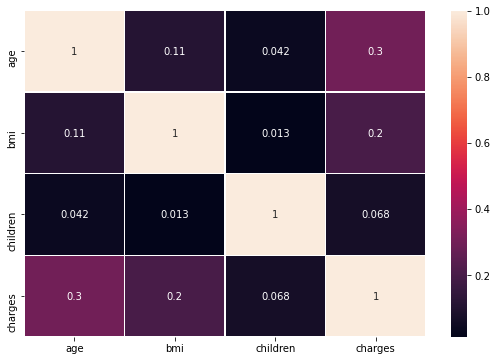

In [19]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5);

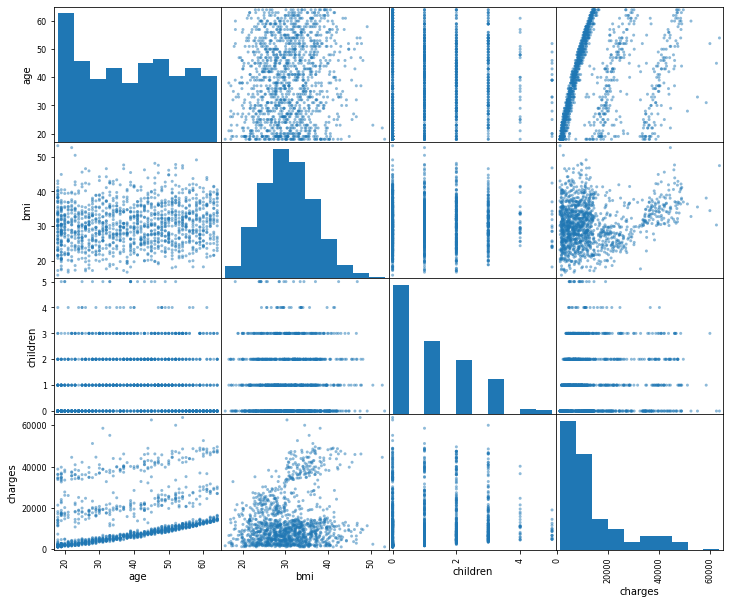

In [20]:
from pandas.plotting import scatter_matrix

#numerical atrributes
num_attribs = ['age', 'bmi', 'children', 'charges']

#plotting scatter matrix of numerical attributes
scatter_matrix(data[num_attribs], figsize=(12,10));

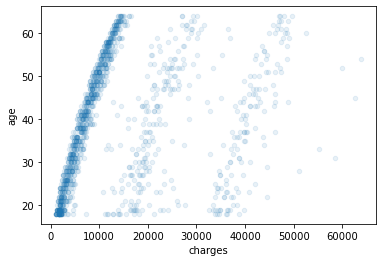

In [21]:
data.plot(kind='scatter', x='charges', y='age', alpha=0.1); 

In [22]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Preparando os dados para os algoritmos de ML

### Variáveis categóricas

In [23]:
#categorical attributes
cat_features = ['sex', 'smoker', 'region']

#how our data should look like
pd.get_dummies(data, columns=cat_features)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Variáveis numéricas

In [24]:
train_str

,age,sex,bmi,children,smoker,region,charges
724,50,female,27.075,1,no,northeast,10106.13425
189,29,female,32.110,2,no,northwest,4922.91590
657,27,male,33.155,2,no,northwest,4058.71245
519,31,male,30.875,0,no,northeast,3857.75925
1234,45,female,27.830,2,no,southeast,8515.75870
...,...,...,...,...,...,...,...
865,40,male,29.900,2,no,southwest,6600.36100
1116,41,male,29.640,5,no,northeast,9222.40260
40,24,female,26.600,0,no,northeast,3046.06200
629,44,female,38.950,0,yes,northwest,42983.45850


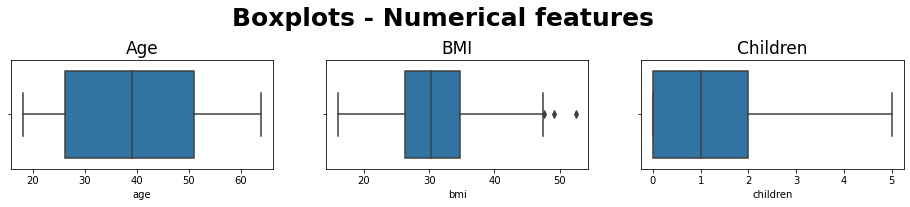

In [25]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Boxplots - Numerical features', weight = 'bold',fontsize=25, y = 1.25)
fig.set_size_inches(16, 2)

sns.boxplot(x=train_str["age"], ax=axs[0])
axs[0].set_title('Age', size=17)

sns.boxplot(x=train_str["bmi"], ax=axs[1])
axs[1].set_title('BMI', size=17)

sns.boxplot(x=train_str["children"], ax=axs[2])
axs[2].set_title('Children', size=17);

### Pipeline de transformação completo

In [26]:
from sklearn.compose import ColumnTransformer #for pipeline
from sklearn.preprocessing import StandardScaler #for numerical features standardization
from sklearn.preprocessing import OneHotEncoder #for categorical features transformation

num_features = ['age', 'bmi', 'children'] #without charges

#creating pipeline
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

#preparing train set for ML
X_train = train_str.drop('charges', axis=1) #features
y_train = train_str['charges'].copy() #dependent variable

#applying pipeline on train set
train_prepared = full_pipeline.fit_transform(X_train)

pd.DataFrame(train_prepared)

,0,1,2,3,4,5,6,7,8,9,10
0,0.764880,-0.585386,-0.085728,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.731581,0.242007,0.748176,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.874101,0.413731,0.748176,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.589061,0.039062,-0.919633,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.408580,-0.461318,0.748176,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.052280,-0.121158,0.748176,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1066,0.123540,-0.163884,3.249888,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1067,-1.087881,-0.663442,-0.919633,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.337320,1.366014,-0.919633,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Selecionando e treinando um modelo

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, y_train)
lin_insurance_predict = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(y_train, lin_insurance_predict)
lin_rmse = np.sqrt(lin_mse)

#Decision Tree Regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_prepared, y_train)
tree_insurance_predict = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(y_train, tree_insurance_predict)
tree_rmse = np.sqrt(tree_mse)

#SVM - Support Vector Machine Regressor
svm_reg = SVR(kernel="linear")
svm_reg.fit(train_prepared, y_train)
svm_insurance_predict = svm_reg.predict(train_prepared)
svm_mse = mean_squared_error(y_train, svm_insurance_predict)
svm_rmse = np.sqrt(svm_mse)

#Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_prepared, y_train)
forest_insurance_predict = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(y_train, forest_insurance_predict)
forest_rmse = np.sqrt(forest_mse)

#creating table to compare results
table_metrics = pd.DataFrame({
    "Metrics": ['MSE', 'RMSE'],
    "Linear Regresion": [lin_mse, lin_rmse],
    "Decision Tree": [tree_mse, tree_rmse],
    "SVM": [svm_mse, svm_rmse],
    "Random Forest": [forest_mse, forest_rmse]
}).sort_index()

table_metrics.set_index('Metrics').round(1)

,Linear Regresion,Decision Tree,SVM,Random Forest
Metrics,,,,
MSE,34839387.0,244239.6,161590595.2,3077152.3
RMSE,5902.5,494.2,12711.8,1754.2


In [28]:
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

### Aplicando a validação cruzada

In [29]:
from sklearn.model_selection import cross_val_score

#get negative mean squared error with cross validation
def scores(model, cv=10):
    return cross_val_score(model, train_prepared, y_train, 
                           scoring='neg_mean_squared_error', cv=cv)

#getting scores for each model
lin_reg_rmse_scores = np.sqrt(-scores(lin_reg))
tree_rmse_scores = np.sqrt(-scores(tree_reg))
svm_scores = np.sqrt(-scores(svm_reg))
forest_rmse_scores = np.sqrt(-scores(forest_reg))

#creating table to present mean and standard deviation
table_scores = pd.DataFrame({
    "Scores": ['Mean', 'Standard Deviation'],
    "Linear Regresion": [lin_reg_rmse_scores.mean(), lin_reg_rmse_scores.std()],
    "Decision Tree": [tree_rmse_scores.mean(), tree_rmse_scores.std()],
    "SVM": [svm_scores.mean(), svm_scores.std()],
    "Random Forest": [forest_rmse_scores.mean(), forest_rmse_scores.std()]
}).sort_index()

table_scores.set_index('Scores').round(1)

,Linear Regresion,Decision Tree,SVM,Random Forest
Scores,,,,
Mean,5936.9,6332.6,12669.3,4576.9
Standard Deviation,564.7,605.3,1318.8,658.3


## Ajustando o modelo

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#hyperparameters
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=6),
    }

#setting model
forest_reg = RandomForestRegressor(random_state=42)

#setting randomized search
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_prepared, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020E2CED4AC8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020E2CEC70C8>},
                   random_state=42, scoring='neg_mean_squared_error')

## Avaliando sistema no conjunto de teste

In [31]:
#setting model according to the best estimator found by Randomized Search
final_model = rnd_search.best_estimator_

#preparing test set
X_test = test_str.drop('charges', axis=1)
y_test = test_str['charges'].copy()

#applying pipeline on test set
X_test_prepared = full_pipeline.transform(X_test) #IT IS NOT FIT_TRANSFORM HERE!!!

#getting predictions
final_predictions = final_model.predict(X_test_prepared)

#evaluating performance
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5586.44234645017